In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import h5py
import scipy
from PIL import Image
from scipy import ndimage

C:\Users\Davide\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Print out a training example

In [5]:
print(train_set_y)

# To access to a single label
k = 0 # First example's label

print()
print(train_set_y[:, k])

# To use the label
print()
print(np.squeeze(train_set_y[:, k]))

# To get the human-readable label
print()
print(classes[np.squeeze(train_set_y[:, k])].decode('utf-8'))

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]

[0]

0

non-cat


In [6]:
def print_example(k):
    print(train_set_x_orig[k])
    print()
    print(classes[np.squeeze(train_set_y[:, k])].decode('utf-8'))
    plt.imshow(train_set_x_orig[k]) 

## Positive example (cat)

[[[ 82  71  68]
  [ 89  83  83]
  [100  98 104]
  ...
  [131 132 137]
  [126 124 124]
  [105  97  95]]

 [[ 95  91  97]
  [104 104 113]
  [110 115 126]
  ...
  [135 134 135]
  [127 122 119]
  [111 105 103]]

 [[ 94  85  83]
  [ 97  89  90]
  [110 109 115]
  ...
  [136 134 131]
  [127 120 117]
  [116 108 104]]

 ...

 [[ 96 116 131]
  [ 97 115 130]
  [103 123 139]
  ...
  [152 155 157]
  [146 149 152]
  [130 133 134]]

 [[ 90 108 123]
  [ 92 108 121]
  [100 119 134]
  ...
  [150 152 155]
  [144 146 147]
  [134 135 134]]

 [[ 86 102 116]
  [ 87 103 115]
  [ 94 114 127]
  ...
  [154 156 160]
  [146 148 152]
  [138 141 142]]]

cat


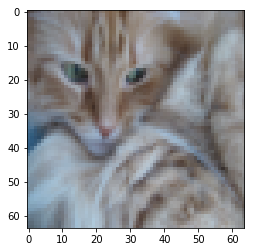

In [7]:
print_example(2)

## Negative example (non-cat)

[[[17 31 56]
  [22 33 59]
  [25 35 62]
  ...
  [ 1 28 57]
  [ 1 26 56]
  [ 1 22 51]]

 [[25 36 62]
  [28 38 64]
  [30 40 67]
  ...
  [ 1 27 56]
  [ 1 25 55]
  [ 2 21 51]]

 [[32 40 67]
  [34 42 69]
  [35 42 70]
  ...
  [ 1 25 55]
  [ 0 24 54]
  [ 1 21 51]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]

non-cat


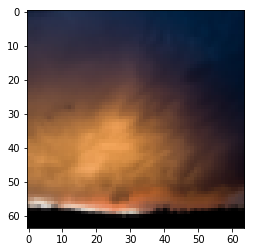

In [8]:
print_example(0)

In [9]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

In [10]:
print("Number of training examples m_train:" + str(m_train))
print("Number of testing examples m_test:" + str(m_test))
print("Height x Width of each image num_px:" + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3")
print("train_set_x_orig shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_orig shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

Number of training examples m_train:209
Number of testing examples m_test:50
Height x Width of each image num_px:64
Each image is of size: (64, 64, 3
train_set_x_orig shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x_orig shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


# Flatten training and test sets

In [11]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [12]:
print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [13]:
# Normalize training and test sets

In [14]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [15]:
def sigmoid(z):
    s = 1/(1 + np.exp(-z))
    return s

In [16]:
# Test
print(sigmoid(0))
print(sigmoid(9.2))

0.5
0.9998989708060922


In [17]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape = (dim, 1))
    b = 0
    
    return w, b

In [18]:
# Test
dim = 2
w, b = initialize_with_zeros(dim)

print(w)
print(b)

[[0.]
 [0.]]
0


In [19]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # Fwd
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y)*(np.log(1 - A)))
    
    # Bwd
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    cost = np.squeeze(cost)
    
    grads = {'dw': dw, 'db':db }
    
    return grads, cost

In [20]:
# Test
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [21]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']

        # Update rule
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("Iteration: " + str(i) + ", cost: " + str(cost))
            
    params = { 'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    return params, grads, costs

In [22]:
# Test
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [23]:
def predict(w, b, X):
        
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)
        
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        
    return Y_prediction

In [24]:
# Test
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


## Model training

In [25]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_costs = False):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_costs)
    
    w = parameters['w']
    b = parameters['b']
    
    # Prediction
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Measures
    train_accuracy = np.mean(np.abs(Y_prediction_train - Y_train))
    test_accuracy = np.mean(np.abs(Y_prediction_test - Y_test))
    
    print()
    print("train accuracy: {} %".format(100 - train_accuracy * 100))
    print("test accuracy: {} %".format(100 - test_accuracy * 100))
    print()
    
    #
    model = { 'costs':costs,
              'Y_prediction_test':Y_prediction_test, 'Y_prediction_train':Y_prediction_train,
              'w':w, 'b':b,
              'learning_rate':learning_rate, 'num_iterations':num_iterations,
              'train_accuracy':(100 - train_accuracy*100), 'test_accuracy':(100 - test_accuracy*100)
            }
    
    return model

In [26]:
nn_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_costs = True)

Iteration: 0, cost: 0.6931471805599453
Iteration: 100, cost: 0.5845083636993085
Iteration: 200, cost: 0.4669490409465547
Iteration: 300, cost: 0.37600686694802077
Iteration: 400, cost: 0.3314632893282512
Iteration: 500, cost: 0.3032730674743828
Iteration: 600, cost: 0.27987958658260487
Iteration: 700, cost: 0.2600421369258757
Iteration: 800, cost: 0.2429406846779662
Iteration: 900, cost: 0.22800422256726066
Iteration: 1000, cost: 0.21481951378449646
Iteration: 1100, cost: 0.2030781906064499
Iteration: 1200, cost: 0.19254427716706862
Iteration: 1300, cost: 0.18303333796883514
Iteration: 1400, cost: 0.1743985943844888
Iteration: 1500, cost: 0.16652139705400335
Iteration: 1600, cost: 0.1593045182975662
Iteration: 1700, cost: 0.15266732471296512
Iteration: 1800, cost: 0.14654223503982333
Iteration: 1900, cost: 0.14087207570310165

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %



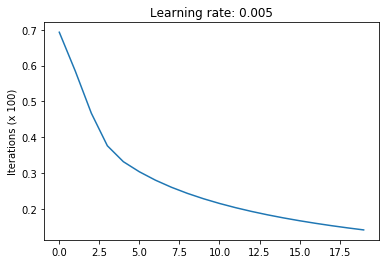

In [27]:
costs = np.squeeze(nn_model['costs'])
plt.plot(costs)
plt.ylabel("Cost")
plt.ylabel("Iterations (x 100)")
plt.title("Learning rate: " + str(nn_model['learning_rate']))
plt.show()

# Testing different Learning rates

In [28]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for alpha in learning_rates:
    print('-------------------------------------------')
    print("Learning rate: " + str(alpha))
    models[str(alpha)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = alpha, print_costs = False)

-------------------------------------------
Learning rate: 0.01

train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------
Learning rate: 0.001

train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------
Learning rate: 0.0001

train accuracy: 68.42105263157895 %
test accuracy: 36.0 %



## Cost vs Number of iterations, parametrized by Learning rate

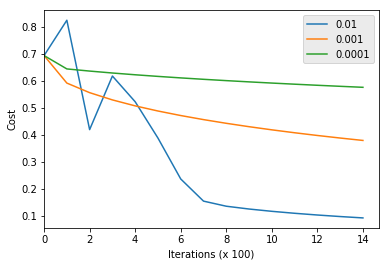

In [29]:
for alpha in learning_rates:
    plt.plot(np.squeeze(models[str(alpha)]['costs']), label = str(models[str(alpha)]["learning_rate"]))
    
plt.xlabel("Iterations (x 100)")
plt.ylabel("Cost")
plt.xlim(left = 0)

legend = plt.legend(loc = "upper right", shadow = False)
frame = legend.get_frame()
frame.set_facecolor("0.90")
plt.show()

## Train and test accuracies vs Learning rate

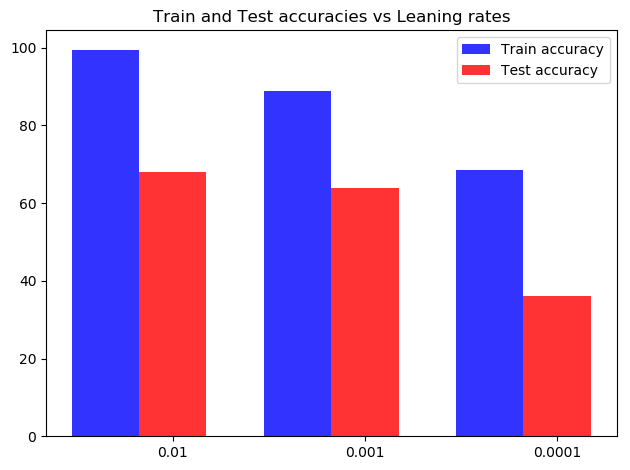

In [42]:
n_groups = len(learning_rates)
train_accuracies = []
test_accuracies = []
for alpha in learning_rates:
    train_accuracies.append(models[str(alpha)]['train_accuracy'])
    test_accuracies.append(models[str(alpha)]['test_accuracy'])
  

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
rects_train = plt.bar(index, train_accuracies, bar_width, alpha = opacity, color = 'b', label = 'Train accuracy')
rect_test = plt.bar(index + bar_width,test_accuracies, bar_width, alpha = opacity, color = 'r', label = 'Test accuracy')

plt.xlabel = "Index"
plt.ylabel = "score"
plt.title('Train and Test accuracies vs Leaning rates')
plt.xticks(index + bar_width, learning_rates)
plt.legend()
plt.tight_layout()
plt.show()